# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')



In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Setting arrays for analysis:  full temperature set, men's temperatures, and women's temperatures
temps = np.asarray(df['temperature'])
mtemps = np.asarray(df.loc[df['gender']=='M','temperature'])
ftemps = np.asarray(df.loc[df['gender']=='F','temperature'])

# Calculate summary statistics of temperature data
temps_mn = np.mean(temps)
temps_md = np.median(temps)
temps_sd = np.std(temps)

In [4]:
# Define function for computer ECDF data returning x,y values
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    
    return x,y

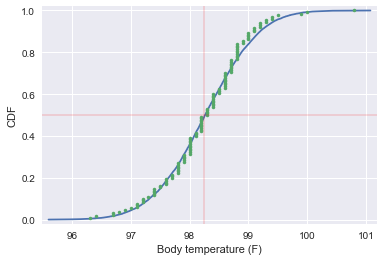

Mean =  98.2492307692
Median[data] =  98.3


In [5]:
# Sample out a normal distribution of mean & standard deviation of data.
test_samp = np.random.normal(temps_mn, temps_sd, size=10000)

# Assign normal distribution data to appropriate variables for plotting: x_test, y_test
x_test,y_test = ecdf(test_samp)

# Assign body temperature data to appropriate variables for plotting: x, y
x,y = ecdf(temps)

# Plot temperature CDF with overlay of normal distribution CDF.
_ = plt.plot(x_test, y_test)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')

# Plot reference lines
plt.axvline(x=temps_mn, color='red', linewidth = 0.25)
plt.axhline(y=0.5, color='red', linewidth = 0.25)

plt.margins(0.02)
plt.show()

print('Mean = ',temps_mn)
print('Median[data] = ', temps_md)


<h6> 1. Is the distribution of body temperatures normal?</h6>
<p>Observing the CDF plot suggests the sample data closely approximate a normal distribution.  Furthermore, the close alignment of mean and median suggest an approximately symmetrical distribution of data.  The combination of summary statistic data and CDF suggest the data can be treated as a normal distribution.
</p>
<h6> 2. Is the sample size large?  Are the observations independent?</h6>
<p>Given the approximation of a normal distribution, and a sample size n > 30, CLT is applicable.  Sample data is considered large enough and a reasonably distributed representation of the population.  Samples appear to be drawn randomly and provide no information to either previous or subsequent samples.  Samples are, therefore, considered independent. </p>

<h6> 3. Is the true population mean really 98.6 degrees F?</h6>
<p>The mean of observations (98.25 degrees F) differ from the conventionally accepted 98.6 degrees F.  Based on summary statistic data, and the consideration of the sample as representative of the population, it is reasonable to suggest 98.6 degrees F is not the true mean.</p>

<p>This can be tested by testing the null hypothesis: </p>

$$H_0: \mu = \mu_0$$

<p>The alternate hypothesis: 
$$H_A: \mu \ne \mu_0$$

<p>Three methods will be applied: 
<ul><b>Bootstrap</b> - this method applies resampling to simulate data collection.  Test statistics are measured to determine percentage of simulated tests that are at least as extreme as the data.  The test statistic that will be used is the empirical difference between the mean values.</ul>

<ul><b>z-test</b> - this method is ideal given a normal distribution, sample size n > 30, and when the standard deviation ($\theta$) of the population is known.  In this case, given the assumption that the sample size and distribution is n > 30 and considered normal, $\theta_{sample}$ will be used.  It should be noted that treating $\theta_{sample}$ as $\theta_{population}$ could produce inaccurate results.</ul>

<ul><b>t-test</b> - this method is generally used when the sample size is n < 30, or when $\theta$ is known for the sample but not the population.  In this case, given $\theta_{sample}$, this method is likely more appropriate for the hypothesis test.</ul>

<p><b>NOTE</b>: Given a single set of data to compare to a mean (without data), all three methods will employ one sample tests. </p> 


In [6]:
# Preparing for bootsrap test.
bt_value = 98.6
bt_shifted = temps - np.mean(temps) + bt_value

# Define functions for bootstrap test.
def diff_from_bt(data, bt_value=98.6):
    return np.mean(data) - bt_value

def bootstrap_replicate_1d(data,func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw boostrap replicates"""
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

diffs = diff_from_bt(temps, bt_value)
bs_replicates = draw_bs_reps(bt_shifted, diff_from_bt, 10000)

p = np.sum(bs_replicates <= diffs) / len(bs_replicates)

print('p-value = ',p)

p-value =  0.0


In [7]:
# z-test and t-test
# Import library
import scipy.stats as st

# Define function for 1 sample z-test.
def ztst_1samp(data, value=1):
    """Performs a one sample z-test, returning z-score and p-value"""
    z = (np.mean(data) - value) / (np.std(data) / np.sqrt(len(data))) 
    
    if np.mean(data) >= value:
        p = st.norm.cdf(-z)
    
    else:
        p = st.norm.cdf(z)
    
    return z,p

z = ztst_1samp(temps,98.6)
print(z)

t,p = st.ttest_1samp(temps, 98.6)
print(t,p)



(-5.4759252020785585, 2.1761575829356528e-08)
-5.45482329236 2.41063204156e-07


<p>Given a one sample test, and determining the t-test most appropriate, the confidence interval and margin of error will be calculated with the formula:   
$$CI = \bar{x} \pm t*_{n-1} \left( 
\frac{s}{\sqrt{n}}\right),  {where}\space
{t*_{n-1}}$$

In [8]:
def t_merci_1samp(ci_val, data):
    
    x = np.mean(data)
    s = np.std(data)
    top =  s
    bottom = np.sqrt(len(data))
    merr = top / bottom
    xmerr = merr * ci_val
    ci = ((x - xmerr, x + xmerr))
    
    
    return xmerr, ci

t,p = st.ttest_1samp(temps, 98.6)
print(t,p)

mer_ci = t_merci_1samp(1.96, temps)

print(mer_ci)
print(np.mean(temps) + (np.std(temps))*t)
print(np.percentile(temps, [2.5,97.5]))
np.std(temps)

-5.45482329236 2.41063204156e-07
(0.12555096480257902, (98.123679804428164, 98.374781734033334))
94.2652581451
[ 96.7225  99.4775]


0.73035777890503795

<p>Under all three test methods, p-values are virtually zero and indicate rejection of the null hypothesis that the true mean body temperature is 98.6 degrees F. </p>

<p>Given a one sample test, and determining the t-test most appropriate, the confidence interval and margin of error were calculated by: </p>

$$CI = \bar{x} \pm t*_{n-1} \left( 
\frac{s}{\sqrt{n}}\right),  {where}\space
{t*_{n-1}}$$

<p>Accounting for the margin of error, the mean body temperature can be considered, with 95% confidence, to be 98.1 - 98.4 degrees F, also rejecting the null hypothesis.</p>  

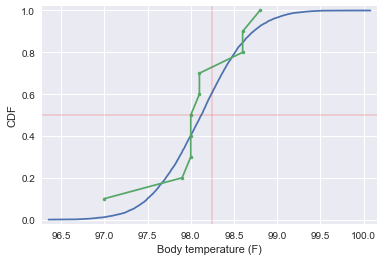

10 sample mean:  98.11
10 sample st.dev:  0.476340214553
10 sample median:  98.05


array([ 97.9,  98.8,  98.6,  97. ,  98. ,  98.6,  98.1,  98. ,  98.1,  98. ])

In [9]:
temps_10tot = np.random.choice(temps,10)
mn10 = np.mean(temps_10tot)
sd10 = np.std(temps_10tot)

# Sample out a normal distribution of mean & standard deviation of data.
test_samp = np.random.normal(mn10, sd10, size=10000)

# Assign normal distribution data to appropriate variables for plotting: x_test, y_test
x_test,y_test = ecdf(test_samp)

# Assign body temperature data to appropriate variables for plotting: x, y
x,y = ecdf(temps_10tot)

# Plot temperature CDF with overlay of normal distribution CDF.
_ = plt.plot(x_test, y_test)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')

# Plot reference lines
plt.axvline(x=temps_mn, color='red', linewidth = 0.25)
plt.axhline(y=0.5, color='red', linewidth = 0.25)

plt.margins(0.02)
plt.show()

print('10 sample mean: ',mn10)
print('10 sample st.dev: ',sd10)
print('10 sample median: ', np.median(temps_10tot))
temps_10tot



In [10]:
t_10s, p_10s = st.ttest_1samp(temps_10tot, 98.6)
z_10s = ztst_1samp(temps_10tot, 98.6)

mer_ci2 = t_merci_1samp(2.26, temps_10tot)

print('10 sample t-stat: ',t_10s, '  p-value: ',p_10s)
print('10 sample z-stat: ',z_10s[0], '  p-value: ',z_10s[1])
print('margin of error: ',mer_ci2[0], '  mean conf.int: ', mer_ci2[1])

10 sample t-stat:  -3.08602959626   p-value:  0.0130126268502
10 sample z-stat:  -3.25296081696   p-value:  0.000571046223435
margin of error:  0.340428324321   mean conf.int:  (97.769571675679003, 98.450428324320995)


<h6><b>4. Draw a small sample size of 10 from the data and repeat both tests. </b></h6>

$$H_0: \mu = \mu_0$$ 
$$H_A: \mu \ne \mu_0$$

<p>The p-values of both tests provide that the null hypothesis should be rejected.  Furthermore, given the hypothesized mean falls outside the margin of error, evidence supports rejecting the null hypothesis. </p>

<p>Points of note:
<ul>
<li>Observing the plot of the data demonstrates a poor fit to the CDF.  Applying CLT and having observed the closer fit to the CDF plot with a higher number of samples, it becomes obvious that the sample size is not large.  As this is a condition of CLT, the conclusions drawn from this sample set are suspect.</ul>
<ul>
<li>Summary statistics demonstrate a mean lower than the larger data set, however, the observing the close alignment between the mean and median suggests that, although the 10 samples do not fit a normal distribution, they approximate symmetry.  This may indicate difficulty applying CLT because the sample is small. </ul>
<ul>
<li>Given the lower number of samples the t-test is appropriate.  Additionally, the p-value associated with the t-test indicates a higher probability of finding observed, or more extreme, results of the null hypothesis.  As opposed to the z-statistic, the t-statistic appears less spread out.  This contrast with normal t and z distributions likely exists given the small sample size and abnormal distribution.  It further provides that the t-test would be the more appropriate test for this sampling.    

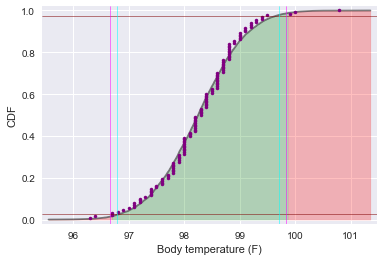

Mean :  98.2492307692     Margin of error:  0.125550964803
2SD :                      ( 96.6629642466 ,  99.8354972918 )
Percentiles (2.5 , 97.5) : ( 96.7225       ,  99.4775 )
Normal temperature range : ( 96.5969490352 ,  99.6030509648 )


In [11]:
import pylab as p

lower = np.percentile(temps, 2.5) - mer_ci[0]
upper = np.percentile(temps,97.5) + mer_ci[0]
sd2lw = temps_mn - temps_sd * 2
sd2hg = temps_mn + temps_sd * 2
sd2lw_adj = temps_mn - mer_ci[0] - temps_sd * 2
sd2hg_adj = temps_mn + mer_ci[0] + temps_sd * 2

# Sample out a normal distribution of mean & standard deviation of data.
test_samp = np.random.normal(temps_mn, temps_sd, size=10000)

# Assign normal distribution data to appropriate variables for plotting: x_test, y_test
x_test,y_test = ecdf(test_samp)

# Assign body temperature data to appropriate variables for plotting: x, y
x,y = ecdf(temps)

# Plot temperature CDF with overlay of normal distribution CDF.
_ = plt.plot(x_test, y_test, color='black', alpha = 0.5)
_ = plt.plot(x, y, marker='.', linestyle='none', color='purple')
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')

# Plot reference lines
plt.axhline(y=0.025, color='maroon', linewidth = 0.5)
plt.axhline(y=0.975, color='maroon', linewidth = 0.5)
plt.axvline(x=sd2lw, color='cyan', linewidth = 0.5)
plt.axvline(x=sd2hg, color='cyan', linewidth = 0.5)
plt.axvline(x=sd2lw_adj, color='magenta', linewidth = 0.5)
plt.axvline(x=sd2hg_adj, color='magenta', linewidth = 0.5)

plt.fill_between(x_test[:160],y_test[:160],color='red', alpha=0.25)
plt.fill_between(x_test[161:9876],y_test[161:9876], color='green', alpha=0.25)
plt.fill_between(x_test[9877:],y_test[9877:], color='red', alpha=0.25)

plt.margins(0.02)
plt.show()

print('Mean : ',temps_mn, '    Margin of error: ', mer_ci[0])
print('2SD :                      (',temps_mn - mer_ci[0] - temps_sd * 2, ', ', temps_mn + mer_ci[0] + temps_sd * 2,')')
print('Percentiles (2.5 , 97.5) : (', np.percentile(temps, 2.5),'      , ', np.percentile(temps,97.5),')')
print('Normal temperature range : (',lower,', ',upper,')')


<h6><b> 5. At what temperature should we consider someone's temperature to be "abnormal"?</b></h6>

<p>Observing the CDF above, horizontal maroon lines indicate percentile divisions at 2.5% and 97.5%.  In short, 95% of the temperature data (purple) are plotted between the maroon horizontal lines.  The percentiles calculated from the data indicate that 95% of the temperature observations were 96.7-99.5 degrees F.  Adjusted for margin of error, the 2SD calculations indicate closely aligned values.</p>

<p> Theoretical 2.5th and 97.5th percentiles, shaded in red closely align with the lines representing the 2SD plots of the data.  Additionally, 95% of theoretical values, in the green shaded area, also demonstrate the range of expected values for body temperature.</p>

<p> Given both theoretical and actual data and adjusting for a margin of error, with 95% confidence, the temperature range 96.6-99.6 degrees F would be considered normal body temperature.  Temperatures outside this range may be considered abnormal, but possibly naturally occuring given the data.</p>

In [12]:
mtemps_mn = np.mean(mtemps)
mtemps_sd = np.std(mtemps)
mtemps_md = np.median(mtemps)

ftemps_mn = np.mean(ftemps)
ftemps_sd = np.std(ftemps)
ftemps_md = np.median(ftemps)

print('Mean temp.  male: ',mtemps_mn,'   female: ',ftemps_mn)
print('Std. dev.   male: ',mtemps_sd,'  female: ',ftemps_sd)
print('Median      male: ',mtemps_md,'            female: ',ftemps_md)
print('Sample size male: ',len(mtemps),'              female: ',len(ftemps))

Mean temp.  male:  98.1046153846    female:  98.3938461538
Std. dev.   male:  0.693359884183   female:  0.737746448643
Median      male:  98.1             female:  98.4
Sample size male:  65               female:  65


<h6><b>6. Is there a significant difference between males and females in normal temperature?</b></h6>

<p>Observing summary statistics for both males and females, it appears that mean and median for both sets closely align.  Additionally, CLT applies with the sample sizes (n > 30).  Noting similarities to the larger data set from which these sets were derived, summary data of both sets suggests approximation of a normal distributions.</p>

<p>That said, the appropriate test would be a two sample z-test.</p>

$$z = \frac{\left( \mu_m - \mu_f \right) - \Delta_{H_0}}{\sqrt{\left( \frac{{\theta_m}^2}{n_m} + \frac{{\theta_f}^2}{n_f}\right)}}$$

<p>Additionally, given two data sets, a permutation test may also be appropriate.  Both will be used to test the hypothesis:</p>

$$H_0: \mu_m = \mu_f$$ 
$$H_A: \mu_m \ne \mu_f$$


In [13]:
def ztst_2samp(data1, data2, h_0):
    """Performs a one sample z-test, returning z-score and p-value"""
    
    d1m, d1s, d1n = np.mean(data1), np.std(data1)**2, len(data1)
    d2m, d2s, d2n = np.mean(data2), np.std(data2)**2, len(data2)
    
    top = d1m - d2m - h_0 
    bottom = d1s**2 / d1n + d2s**2 / d2n
    
    z = top / np.sqrt(bottom)
    
    if d1m >= d2m:
        p = st.norm.cdf(-z)
    
    else:
        p = st.norm.cdf(z)
    
    return z,p

In [14]:
#Perform z test and print p-value
z = ztst_2samp(mtemps, ftemps, 0)

print('p-value = ',z[1])

p-value =  0.000661163345897


In [15]:
def z_merci(z_conf_int, data1, data2):
    full = np.concatenate((data1, data2))
    prop = len(data1)/ len(full)
    propi = 1 - prop
    prop2 = len(data2) / len(full)
    cal = prop * propi / len(full)
     
    m_err = z_conf_int * np.sqrt(cal)
    c_int = (np.mean(data1) - np.mean(data2)) + np.array([-1,1]) * m_err
    
    if prop + prop2 == 1 and propi * len(data1) >= 10 and prop * len(data1) >=10:
        x = 'check'
    else:
        x = 'verify'
    
    return m_err, c_int, x
        

In [16]:
merr = z_merci(1.96, mtemps, ftemps)

print('margin of error: ',merr[0])
print('confidence interval : (',mtemps_mn + merr[1][0],', ',mtemps_mn - merr[1][1],')')
print('z-score :',z[0])
merr[2]

margin of error:  0.0859516858921
confidence interval : ( 97.7294329295 ,  98.307894468 )
z-score : -3.21108966273


'check'

In [17]:
#Boolean test to determine if means are equal with margin of error
ftemps_mn == mtemps_mn - merr[1][1]

False

In [18]:
#Boolean test to determine if the mean for men is greater than women's with margin of error
ftemps_mn < mtemps_mn - merr[1][1]

False

In [19]:
#Boolean test to determine if the mean for women is greater than men's with margin of error
ftemps_mn > mtemps_mn - merr[1][1]

True

<p>Given a p-value very close to zero, evidence is given to reject the null hypothesis.  Further evaluation of the margin of error and confidence intervals demonstrate, with 95% confidence, male body temperature nearing the mean of the female body temperature.  A closer look indicates that the mean female body temperature falls outside the margin of error and provides further evidence to reject the null hypothesis.</p>

<p>With two data sets, a permutation test may be useful to test the hypothesis.</p>

In [20]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets"""
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multipl permutation replicates"""
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates



In [21]:
# Calculate empirical difference of means
empirical_diff_means = diff_of_means(mtemps, ftemps)

# Draw 10000 permutation replicates
perm_replicates = draw_perm_reps(mtemps, ftemps, diff_of_means, size=10000)

# Calculate & print p-value
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)


print('p-value: ', p)
print('empirical difference of means: ',empirical_diff_means)
print('95% confidence interval: ', np.percentile(perm_replicates, [2.5, 97.5]))


p-value:  0.0147
empirical difference of means:  -0.289230769231
95% confidence interval:  [-0.25230769  0.25238462]


Although the higher p-value demonstrates that, in some instances, finding observations at least as extreme as the data was possible in the simulation, it fails to provide enough evidence to support the null hypothesis.  Given the observed difference of mean temperature falls outside the 95% confidence interval, it is reasonable to reject the null hypothesis in favor of concluding that the true mean male body temperature does not equal the true mean female body temperature.

<h3><b>Summary</b></h3>

<p>In this exercise, observations from Carl Wunderlich's study on normal body temperature were the subject of exploration.  Statistical concepts of hypothesis testing, confidence intervals, and statistical significance were utilized in the analysis of data in order to answer questions concerning Wunderlich's conclusions.  One question of note:  Is the true population mean really 98.6 degrees F? </p>

<p>Exploration began with determining if the data fit a normal distribution.  Summarizing Central Limit Theorem (CLT), as the number of observations gets larger, the distribution of data becomes more normally distributed.  This is important because, if the sample data (i.e. mean, standard deviation, etc) is normally distributed, it can be deemed representative of the population.  Consequently, conclusions drawn from normally distributed data are likely to apply to the population.</p>

<p>If the body temperature data is plotted over a normal distribution, it should align if it is normally distributed.  For this to work, the normal distribution key, should have the same parameters (mean, standard deviation, etc) of the data.  To get this key, 10,000 samples were simulated and plotted with the actual sample data.  While not perfect, the alignment was such that the data could be treated as a normal distribution.  Since one person's body temperature generally doesn't determine anothers, each observation could be assumed independent.  Given the disbribution, the sample size could be considered large, meeting conditions of CLT.</p>

<p>The sample mean, however, was 98.25 degrees F; quite different from Wunderlich's value (98.6$^{\circ}$F).  Perhaps it's because the true mean encompasses a much larger set of data.  However, if the distribution is normal, the mean calculated should be representative.  This difference can be tested through hypothesis testing methods.  Stating a clear hypothesis is important.  For these tests, the hypothesis is that the true mean is not 98.6 degrees F.  This is testable through a null hypothesis:  The true mean is 98.6 degrees F.</p>

<p>What the null hypothesis is saying is that if more observations were collected, the mean would eventually become reach Wunderlich's value.  Since two samples cannot be tested against each other, a one sample test is used.  The test methods used were Bootstrap, t-test, and z-test.  Each test involves analyzing the distribution and calculating a p-value that represents the probability that simulated findings would observe at least the extreme observed in the data.</p>

<p> Generally, the most appropriate testing method would be used rather than three tests.  In this case, it could be argued that the most appropriate test method is the t-test rather than the z-test.  This is because the population standard deviation is not known.  The argument can be made that if the data are representative, then the standard deviation could be considered representative as well.  That would allow the z-test to be utilized.  Given the larger sample size, the z-test would be preferable over the t-test.  This exercise, however, is about exploration of statistical methods and their findings.  All three testing methods produced findings that suggested rejection of the null hypothesis.  In other words, based on the testing the true mean body temperature is NOT 98.6 degrees F.</p>


<p>Further exploring testing methods, a random sample of 10 observations was taken from the body temperature data.  In this case, given the small smaple size, applying the z-test is inappropriate.  The t-test, on the other hand, is better suited for smaller sample sizes.  The t-test returned a higher probability of finding observations as extreme as the observed data than the z-test, but neither p-value supported the null hypothesis.  Testing suggested, again, that the true mean body temperature is not 98.6 degrees F.  An interesting observation about the t-score and z-score:  the t-score suggested a distribution less spread out than the z-score.  Under normal distribution circumstances (with more than 30 values), the z-distribution is less spread out than the t-distribution.  This is likely demonstrative of the reason the z-test is less revealing for small samples.</p>

<p>Further exploration of the data revealed a rationale for determining what would be considered "normal" body temperature.  In the plot of theoretical and actual data, it is revealed that 95% of all the data (both theoretical and actual) demonstrated close alignment with a range from 96.6-99.6 degrees F.  Given a normal distribution, approximately 95% of data is found within 2 standard devations from the mean.  That said, computing 2 standard deviations from the mean also showed alignment with the 96.6-99.6 degree F range. </p>

<p>Given the data includes male and female body temperatures, further exploration into the possibility of significant differences in body temperature.  The data suggested that men and women showed different body temperature.  To determine if this difference was significant the null hypothesis that the true means were the same was tested. </p>

<p>Given two data sets, a two sample test was possible.  Two test methods were applied.  First, the two sample z-test was performed.  The resulting p-value suggested the absence of significant evidence to support the null hypothesis.  When adjusted for margin of error, the high range of male body temperature looked to be fairly close to the mean female body temperature value.  Upon closer inspection, the mean female body temperature value was not within the margin of error, providing more evidence to reject the null hypothesis.</p>

<p>The second test method used was a permutation test.  In this case, assumption of the null hypothesis suggested if values were permutated together, the differences between the means should also remain the same.  The p-value returned a low probability of observing values at least as extreme as the null hypothesis.  With the empirical difference of means falling outside the 95% confidence interval of simulated difference of means, the null hypothesis is not supported.</p>

<p>After exploring the data and testing methods, it can be reasonably concluded that the true mean body temperature is not the conventionally accpeted 98.6 degrees F.  Given the ability to subdivde the population even more (i.e. male, female) and find significant differences, should body temperature undergo further analysis to determine if separate scales are necessary to account for these differences?  It is possible to put this question to the test.  For now, however, suffice it to say that the male and female mean body temperatures fall within the 96.6-99.6 degrees F range; suggesting it is reasonable to continue sharing the scale.</p>